In [5]:
# Lassoは線形モデルの中でもL1正則化を用いており、いくつかの係数が完全に0になる

from sklearn.linear_model import  Lasso
import mglearn
from sklearn.model_selection import train_test_split
import numpy as np

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso = Lasso().fit(X_train, y_train)

# スコアが悪いのは適合不足を表している
# 全体で104の特徴量のうち、4つしか使用していないことになる
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114596
0.20937503255272272
4


In [6]:
# 適合度合いの不足をへらすにはalphaをへらす
# その場合には、max_iter(繰り返しの回数) をデフォルト値から増やしてあげる必要がある
from sklearn.linear_model import  Lasso
import mglearn
from sklearn.model_selection import train_test_split
import numpy as np

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print(np.sum(lasso001.coef_ != 0 ))

0.8965069559751289
0.7656489887843523
33


In [7]:
# alphaを小さくしすぎると、リッジの場合と同様に正則化の効果が薄れる

from sklearn.linear_model import  Lasso
import mglearn
from sklearn.model_selection import train_test_split
import numpy as np

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso0001 = Lasso(alpha = 0.001, max_iter = 100000).fit(X_train, y_train)
print(lasso0001.score(X_train, y_train))
print(lasso0001.score(X_test, y_test))
print(np.sum(lasso0001.coef_ != 0 ))

0.9396620850927063
0.7396519336121415
69


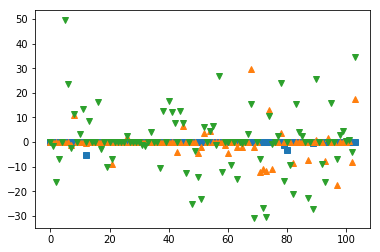

In [8]:
from matplotlib import pyplot as plt

# 特徴量がたくさんあって、重要なものがわずかしかないことが予測されるのであれば、Lassoのほうが向いている
plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha=0.01')
plt.plot(lasso0001.coef_, 'v', label = 'Lasso alpah=0.001')